<img src = "https://www.bits-pilani.ac.in/Uploads/Campus/BITS_university_logo.gif">

<h2><center>Machine Learning : Assignment 2 </center></h2>

<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>

<h2>Group No : 090</h2>

<table>
  <tr>
    <th>Full Name</th>
    <th>BITS ID</th>
  </tr>
  <tr>
    <td>Sharath Vaidyanath</td>
    <td>2019HC04539</td>
  </tr>
</table>

**Q2) K-Nearest Neighbour Model**

**1. Loading of libraries and viewing the dataset**

In [1]:
#Importing Standard libraries for analysis and visualizations 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the data into a dataframe
df = pd.read_csv(r"F:\M.tech\Study Materials\2nd Sem Materials\Machine Learning\Slides\Assignment - 2\Q2\parkinsons_data.csv")

In [3]:
#Reading the first five entries of the dataframe
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
#Reading the summary to get some insights about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

**2.Handling of missing values and outliers***

In [5]:
#Checking for any Null values present at the data
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

**There are no null values present at the data!!**

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [7]:
#Performing a correlation analysis between the variables.
df.corr().transpose()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


**Performing Explorataory data analysis on the dataset** 

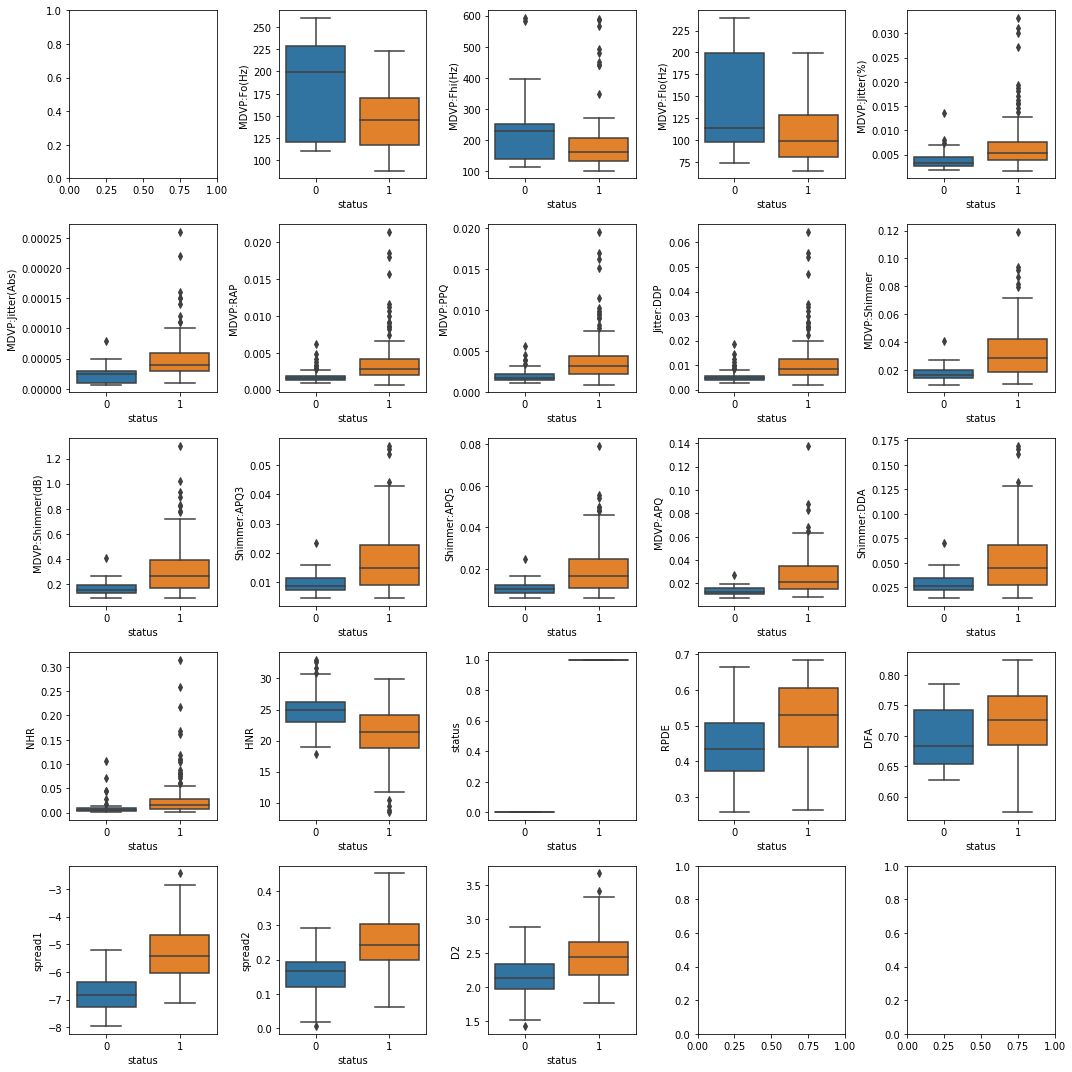

In [8]:
#Identifying the outliers by boxplot
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(1,len(df.columns)-1):
    sns.boxplot(x='status',y=df.iloc[:,i],data=df,orient='v',ax=axes[i])
plt.tight_layout()
plt.show()

**Observations :-**

From the above, we can see outliers present for the following columns

MDVP:Fhi(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, spread1, spread2 and D2

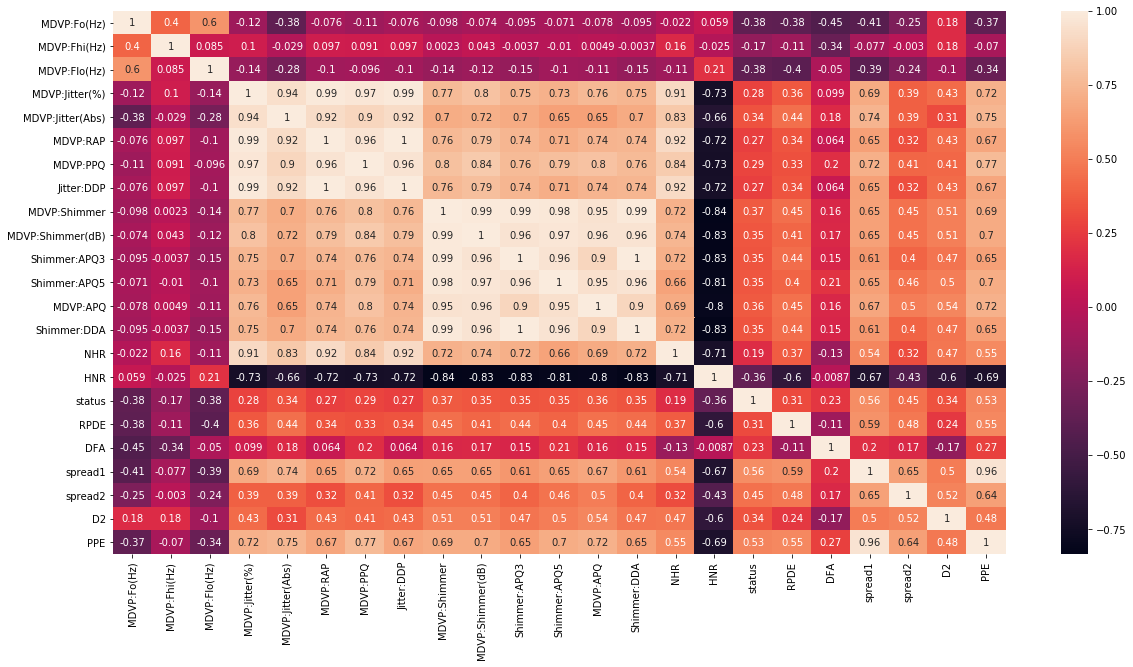

In [9]:
#Visualzing the heatmap for the correlated data
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [10]:
#Dropping of unnecessary columns
df = df.drop(['name'], axis=1)

In [11]:
X = df.drop(['status'], axis = 1)
#target variable
y = df['status']

In [12]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df.drop('status', axis = 1))
std_data = sc.transform(df.drop('status', axis = 1))

In [13]:
#Viewing the standardized data 
std_data = pd.DataFrame(std_data,columns=X.columns)
std_data

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.483467,0.371185,-0.508265,-0.337173,-0.401899,-0.228505,-0.311189,-0.227459,0.593395,0.631498,...,0.199282,0.759930,0.069278,-0.536647,-0.483208,-1.090704,-0.785527,-1.256837,0.721944,-0.817703
191,1.339202,0.612690,-0.618218,-0.120037,-0.401899,0.001213,-0.191272,0.002258,-0.116922,-0.099041,...,-0.313046,0.037108,-0.167360,-0.620463,-0.644916,-0.631503,-0.469859,-1.168475,1.054135,-0.418929
192,0.495578,0.470104,-0.968393,1.526058,1.037674,0.991026,0.797139,0.992069,-0.352453,-0.135053,...,-0.438466,-0.294679,2.041513,-0.906799,-0.877441,-1.130853,-1.014154,-0.818079,0.780338,-0.832410
193,1.078761,2.190044,-0.954180,0.243924,-0.113985,0.132963,0.164847,0.131755,-0.358834,-0.212223,...,-0.485202,-0.297970,1.175327,-0.649233,-0.456374,-1.343323,-0.974960,-0.229066,-0.637003,-0.926105


**3. Splitting the standardized data into Train and Test data**

In [14]:
#splitting the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(std_data,df['status'],test_size=0.30,random_state=101, stratify=y)

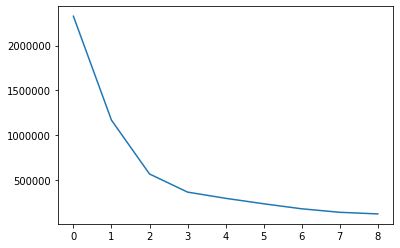

In [15]:
#Let's use the elbow curve method to identify the ideal number of neighbours.
from sklearn.cluster import KMeans
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df.drop('status', axis = 1))
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

From the above graph, the optimum K values can be either **2 or 3**

In [16]:
#Calculating K value by RMSE method
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k = ' , K , 'is :', error)

RMSE value for k =  1 is : 0.13018891098082386
RMSE value for k =  2 is : 0.13018891098082386
RMSE value for k =  3 is : 0.12274328238644312
RMSE value for k =  4 is : 0.1691203563006365
RMSE value for k =  5 is : 0.1913378412429842
RMSE value for k =  6 is : 0.20004707543904196
RMSE value for k =  7 is : 0.21689293633470888
RMSE value for k =  8 is : 0.2402770293795427
RMSE value for k =  9 is : 0.23725076679417398
RMSE value for k =  10 is : 0.23828483169717107
RMSE value for k =  11 is : 0.25439132467692027
RMSE value for k =  12 is : 0.2571940432718818
RMSE value for k =  13 is : 0.2630602250013016
RMSE value for k =  14 is : 0.27491704984611504
RMSE value for k =  15 is : 0.2878585130589152
RMSE value for k =  16 is : 0.291338596766892
RMSE value for k =  17 is : 0.29788218913554976
RMSE value for k =  18 is : 0.2992632370317327
RMSE value for k =  19 is : 0.30343047018567587
RMSE value for k =  20 is : 0.3079456258409531


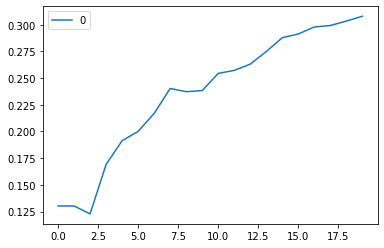

In [17]:
#plotting the rmse values against k values obtained
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

From the above graph, the optimum K values should be **3**

However, due to many hyperparameters, and large search space, we shall use Gridsearch to identify the optimum nieghbours

In [18]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 2}

Hence, we shall fix the value of K as **2**

**4. Creation of model and calculation of accuracy** 

Let's see the metric that works the best among minkowski, manhattan and euclidean

- **Using minkowski metric**

In [19]:
#Model Creation using minkowski metric 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [20]:
#Prediction
pred_mm = knn.predict(X_test)

In [21]:
#Confusion Matrix and Classification Report
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix : \n")
print(confusion_matrix(y_test,pred_mm))
print("\n")
print("Classification Report : \n")
print(classification_report(y_test,pred_mm))

Confusion Matrix : 

[[15  0]
 [ 3 41]]


Classification Report : 

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       1.00      0.93      0.96        44

    accuracy                           0.95        59
   macro avg       0.92      0.97      0.94        59
weighted avg       0.96      0.95      0.95        59



- **Using Manhattan distance**

In [22]:
#Model Creation using manhattan metric 
knn = KNeighborsClassifier(n_neighbors=2, metric='manhattan')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [23]:
#Prediction
pred_mah = knn.predict(X_test)

In [25]:
#Confusion Matrix and Classification Report
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix : \n")
print(confusion_matrix(y_test,pred_mah))
print("\n")
print("Classification Report : \n")
print(classification_report(y_test,pred_mah))

Confusion Matrix : 

[[15  0]
 [ 4 40]]


Classification Report : 

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.91      0.95        44

    accuracy                           0.93        59
   macro avg       0.89      0.95      0.92        59
weighted avg       0.95      0.93      0.93        59



- **Using Euclidean distance**

In [26]:
#Model Creation using euclidean metric 
knn = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [27]:
pred_euc = knn.predict(X_test)

In [28]:
#Confusion Matrix and Classification Report
print("Confusion Matrix : \n")
print(confusion_matrix(y_test,pred_euc))
print("\n")
print("Classification Report : \n")
print(classification_report(y_test,pred_euc))

Confusion Matrix : 

[[15  0]
 [ 3 41]]


Classification Report : 

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       1.00      0.93      0.96        44

    accuracy                           0.95        59
   macro avg       0.92      0.97      0.94        59
weighted avg       0.96      0.95      0.95        59



**Conclusion:-**

**Hence, The KNN model has proven to be an effective model in diffrentiating healthy people from those with Parkinson's Disease**